In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

## read in data
df = pd.read_csv('HW1_result.csv')
## check data shape
df.shape

(5000, 4)

In [2]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import scipy.stats as ss
import matplotlib.pyplot as plt
import math
from nltk.corpus import stopwords
from collections import Counter 
import re
import numpy as np


### Task A

In [3]:
words_list = []
trans=str.maketrans({key: None for key in string.punctuation})
for i in df["comments"]:
    word = word_tokenize(str(i).translate(trans))
    words_list.extend(word)
lower_word = [w.lower() for w in words_list]
words = set(lower_word)
counts = [(w, lower_word.count(w)) for w in words]
[(w, c) for (w, c) in counts if c > 500]
sorted_counts = sorted(counts, key = lambda x:x[1], reverse=True)
sorted_counts_rank = ss.rankdata([-1*c for (w,c) in sorted_counts]).astype(int)
words_rank = np.column_stack((sorted_counts, sorted_counts_rank))[:99]
words_df = pd.DataFrame(words_rank, columns = ["words","counts","rank"])
words_df["logcount"] = words_df["counts"].astype(int).map(lambda x : math.log(x))

<AxesSubplot:xlabel='rank'>

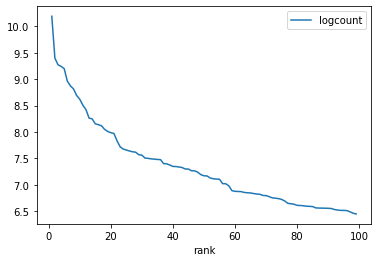

In [4]:
words_df[["rank","logcount"]].astype(float).plot(x = "rank")

### Task B

In [12]:
## read comaparable model data in data
df2 = pd.read_csv('car models and brands.csv')
                  
## remove duplicate models 
## df2.drop_duplicates(subset='Model')

## tranfer dataframe into dictionary and key is Model
car_dic = dict(zip(df2.Model, df2.Brand))
car_dic

{'integra': 'acura',
 'legend': 'honda',
 'vigor': 'acura',
 'rlx': 'acura',
 'ilx': 'acura',
 'mdx': 'acura',
 'rdx': 'acura',
 'tsx': 'acura',
 'rsx': 'acura',
 'quattro': 'audi',
 'a4': 'audi',
 'a6': 'audi',
 'a5': 'audi',
 'a7': 'audi',
 'q3': 'audi',
 'q5': 'audi',
 'q7': 'audi',
 'a8': 'audi',
 'a3': 'audi',
 '3-series': 'bmw',
 '5-series': 'bmw',
 '6-series': 'bmw',
 '4-series': 'bmw',
 'xdrive': 'bmw',
 'alpina': 'bmw',
 '330ci': 'bmw',
 '328i': 'bmw',
 '330c': 'bmw',
 '335i': 'bmw',
 '335d': 'bmw',
 '528i': 'bmw',
 '535i': 'bmw',
 '128i': 'bmw',
 '640i': 'bmw',
 '3er': 'bmw',
 '5er': 'bmw',
 'm5': 'bmw',
 'm3': 'bmw',
 'm6': 'bmw',
 'bmws': 'bmw',
 'bmwesque': 'bmw',
 'park avenue': 'buick',
 'la crosse': 'buick',
 'lacrosse': 'buick',
 'century': 'toyota',
 'enclave': 'buick',
 'encore': 'buick',
 'regal': 'buick',
 'buicks': 'buick',
 'escalade': 'cadillac',
 'srx': 'cadillac',
 'xts': 'cadillac',
 'cars': 'car',
 'grand blazer': 'chevrolet',
 'trailblazer': 'chevrolet',
 '

In [6]:
word_list = []
for x in df["comments"]:
    text = str(x)
    for i,j in car_dic.items():
        pattern = re.compile(i,re.IGNORECASE)
        text = pattern.sub(j,text)
    result = word_tokenize(text)
    for y in result:
        word_list.append(y.lower())
word_frequencies = Counter(w for w in word_list)

In [7]:
# test
word_frequencies['a4']


0

In [8]:
# store all car brand word frequencies into a new dictionary
brand = {}
for i in df2["Brand"].value_counts().index:
    brand[i] = word_frequencies[i]

In [9]:
## store it to a dataframe
df_brand = pd.DataFrame([brand]).T
df_brand = df_brand.reset_index()
df_brand.columns =['Brand','Frequency']
df_brand2 = df_brand[df_brand['Brand'] != 'car'][df_brand['Brand'] != 'seat']\
[df_brand['Brand'] != 'sedan'][df_brand['Brand'] != 'problem']


## sort it by frquency from high to low
df_brand2.sort_values(by=['Frequency'],ascending = False)[:10]

<ipython-input-9-901f89a03670>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_brand2 = df_brand[df_brand['Brand'] != 'car'][df_brand['Brand'] != 'seat']\


,Brand,Frequency
7,bmw,2821
15,acura,914
13,audi,878
2,honda,684
14,infiniti,574
9,nissan,509
0,toyota,446
8,subaru,379
33,mercedes-benz,356
11,volkswagen,323


In [10]:
## since car and seat are not car brands. we delete them and choose the top ten again
df_brand2 = df_brand[df_brand['Brand'] != 'car'][df_brand['Brand'] != 'seat'][df_brand['Brand'] != 'sedan']
df_brand2[:10]

<ipython-input-10-8f20d9dba7ab>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_brand2 = df_brand[df_brand['Brand'] != 'car'][df_brand['Brand'] != 'seat'][df_brand['Brand'] != 'sedan']


,Brand,Frequency
0,toyota,446
1,chevrolet,132
2,honda,684
3,hyundai,195
4,mazda,90
5,suzuki,21
6,ford,206
7,bmw,2821
8,subaru,379
9,nissan,509


In [11]:
## since problem is also not car brand. we need to do this process again
df_brand3 = df_brand2[df_brand2['Brand'] != 'problem']
df_brand3[:10]

,Brand,Frequency
0,toyota,446
1,chevrolet,132
2,honda,684
3,hyundai,195
4,mazda,90
5,suzuki,21
6,ford,206
7,bmw,2821
8,subaru,379
9,nissan,509


### Task C

In [39]:
## create a list of top ten brands
list=[]
for a in df_brand3['Brand'][:10]:
    list.append(a)
list

['bmw',
 'acura',
 'audi',
 'honda',
 'infiniti',
 'nissan',
 'toyota',
 'subaru',
 'volkswagen',
 'volvo']

In [42]:
## define a function to tokenize words for each post 
def filterComment(value):
    value = str(value)
    ## remove punctuation
    result = value.translate(trans)
    text = word_tokenize(result)
    filtered_sentence = []
    for w in text:
    ## remove stop words
        w = w.lower()
        if w not in stop_words:
            ## replace model with car brand
            i = 0
            for key in car_dic.keys():
                if w == key:
                    i += 1
            if i == 0:
                filtered_sentence.append(w)
            else:   
                a = car_dic[w]
                filtered_sentence.append(a)
    return filtered_sentence


In [43]:
## apply the function to each post and store the result in a new column
df['Filtered comments'] = df['comments'].map(filterComment)
df.head()

,Unnamed: 0,Date,user_id,comments,Filtered comments
0,0,"March 24, 2002 10:54PM",merc1,I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,..."
1,1,"March 25, 2002 12:06AM",fredvh,I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric..."
2,2,"March 25, 2002 10:02AM",blueguydotcom,"Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best..."
3,3,"March 25, 2002 4:04PM",hungrywhale,And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte..."
4,4,"March 25, 2002 5:44PM",riez,One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, 3, series, many, models, ch..."


In [45]:
## creating a dummy column for each of the top10 brand
for brand in list:
    df[brand] = df['Filtered comments'].map(lambda x: 1 if brand in x else 0)

In [46]:
df.head()

,Unnamed: 0,Date,user_id,comments,Filtered comments,bmw,acura,audi,honda,infiniti,nissan,toyota,subaru,volkswagen,volvo
0,0,"March 24, 2002 10:54PM",merc1,I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...",1,1,1,0,0,0,1,0,0,0
1,1,"March 25, 2002 12:06AM",fredvh,I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...",0,1,0,1,0,0,0,0,0,0
2,2,"March 25, 2002 10:02AM",blueguydotcom,"Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",0,0,0,0,0,0,0,0,0,0
3,3,"March 25, 2002 4:04PM",hungrywhale,And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",0,0,0,0,0,0,0,0,0,0
4,4,"March 25, 2002 5:44PM",riez,One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, 3, series, many, models, ch...",1,0,0,0,0,0,0,0,0,0


In [49]:
## creating the lift matrix
lift_matrix = pd.DataFrame(index = list, columns = list)

## fill in the lift matrix
for brand1 in list:
  freq_brand1 = sum(df[brand1] == 1)
  for brand2 in list:
    if brand1 == brand2:
      lift_matrix.loc[brand1, brand2] = 1
    else:
      freq_brand2 = sum(df[brand2] == 1)
      freq_both = sum( (df[brand1] == 1) & (df[brand2] == 1 ) )
      lift = len(df) * freq_both / (freq_brand1 * freq_brand2)
      lift_matrix.loc[brand1, brand2] = lift
        
lift_matrix

,bmw,acura,audi,honda,infiniti,nissan,toyota,subaru,volkswagen,volvo
bmw,1,1.537788,1.72117,1.254807,2.034505,1.261098,1.450061,1.216232,1.583615,1.54533
acura,1.537788,1,2.240007,2.615399,3.078934,2.233372,1.787753,2.169536,1.646502,3.540683
audi,1.72117,2.240007,1,1.45952,2.761044,1.592812,1.385735,1.795644,4.558776,5.004634
honda,1.254807,2.615399,1.45952,1,1.422704,4.025927,3.94618,1.598758,2.166656,2.283939
infiniti,2.034505,3.078934,2.761044,1.422704,1,2.51589,1.164803,1.815405,2.023508,2.804487
nissan,1.261098,2.233372,1.592812,4.025927,2.51589,1,3.844696,1.466754,2.863033,3.780965
toyota,1.450061,1.787753,1.385735,3.94618,1.164803,3.844696,1,1.305603,2.374579,2.457606
subaru,1.216232,2.169536,1.795644,1.598758,1.815405,1.466754,1.305603,1,2.111486,5.177515
volkswagen,1.583615,1.646502,4.558776,2.166656,2.023508,2.863033,2.374579,2.111486,1,4.417879
volvo,1.54533,3.540683,5.004634,2.283939,2.804487,3.780965,2.457606,5.177515,4.417879,1


### Task D

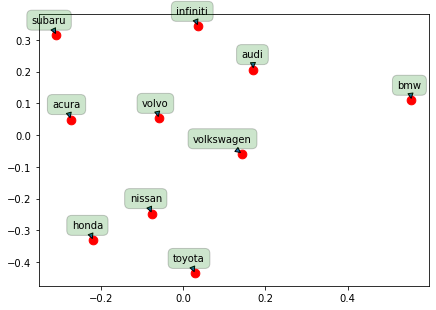

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS


## create dissmilarity matrix
dis_matrix = 1/lift_matrix
np.fill_diagonal(dis_matrix.values, 0)

mds = MDS(2,random_state=10)
results = mds.fit(dis_matrix)

plt.figure(figsize=(7,5))
plt.scatter(x,y, marker = 'o', color = 'red', s = 75)

for brand, x_coord, y_coord in zip(list, x, y):
  plt.annotate(s = brand, 
               xy = (x_coord,y_coord),
               xytext = (10, 10),
               textcoords = 'offset points', 
               ha = 'right', 
               va = 'bottom',
               bbox = dict(boxstyle = 'round,pad=0.5', fc = 'green', alpha = 0.2),
               arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'arc3,rad=0'))

plt.show()

### Task E

Volvo and Subaru are close competitors.

Volvo, Volkswagen and Audi are close competitors.

Nissan and Honda are close competitors.

BMW is not commonly mentioned with other luxury sedans.

### Task F

In [37]:
## create an empty list to store tokenized words
word_list_stop = []

## set up stop words
stop_words = set(stopwords.words('english'))

## for every post tokenized it, then store in the list

trans=str.maketrans({key: None for key in string.punctuation})
for i in df["comments"]:
    word = word_tokenize(str(i).translate(trans))
    filtered_sentence_stop = []
    for w in word:       
    ## remove stop words
        w = w.lower()
        if w not in stop_words:
            ## replace model with car brand
            i = 0
            for key in car_dic.keys():
                if w == key:
                    i += 1
            if i == 0:
                filtered_sentence_stop.append(w)
            else:   
                a = car_dic[w]
                filtered_sentence_stop.append(a)
    word_list_stop.extend(filtered_sentence_stop)

word_frequencies_stop = Counter(w for w in word_list_stop)
word_frequencies_stop

Counter({'personally': 97,
         'think': 1215,
         'tweaks': 6,
         'c320': 36,
         'could': 502,
         'also': 724,
         'sit': 37,
         'top': 265,
         'group': 53,
         'still': 630,
         'entrylevel': 67,
         'luxury': 701,
         'sedan': 937,
         'mercedes-benz': 166,
         'would': 1427,
         'lead': 23,
         'believe': 310,
         'sport': 398,
         'needs': 125,
         'suspension': 159,
         'retuned': 1,
         'accept': 33,
         '17': 33,
         'inch': 48,
         'tires': 447,
         'without': 269,
         'harsh': 19,
         'ride': 241,
         'mb': 287,
         'stop': 105,
         'forcing': 7,
         'metal': 12,
         'trim': 47,
         'black': 44,
         'leather': 128,
         'everyone': 148,
         'wants': 61,
         'package': 304,
         'c240s': 1,
         '6speed': 87,
         'wouldnt': 177,
         'hurt': 24,
         'either': 258,
      

In [51]:
df_attribute = pd.DataFrame.from_dict(word_frequencies_stop, orient='index').reset_index().rename(columns={'index':'attribute', 0:'count'})
df_attribute.sort_values(by=['count'],ascending = False)[:50]

,attribute,count
57,car,5848
86,bmw,2566
69,like,1789
125,tl,1780
140,one,1546
14,would,1427
68,dont,1388
191,g35,1327
267,get,1294
1,think,1215
